# TASK#2

# Problem Definition :- 
## Bone Mineral Density - توقُّع الكثافة المعدنية للعظام
كثافة العظام أو الكثافة المعدنية للعظام هو مصطلح يعبرعن كمية المعادن العظمية في كل سنتيمتر مربع من نسيج العظام<br>
الكثافة المعدنية للعظام تستعمل في الطب الإكلينيكي كمؤشر غير مباشرعلى الإصابة بتخلخل العظام وخطر الكسور.<br>
ref: https://en.wikipedia.org/wiki/Bone_density

Use multiple linear regression or polynomial regression to reduce the mean square error acquired on the dataset provided.<br>
You should apply preprocessing, feature selection and use at least a train-test split (80% train-20% test)

In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model
#
from pre_processing import LabelEncoder
from pre_processing import featureScaling
from pre_processing import feature_one_hot_encoder


# Exploratory Data Analysis

In [593]:
bone_df = pd.read_csv("data_bmd.csv")
bone_df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [594]:
print(f'#Features we have intially: {bone_df.columns}')
bone_df.info()

#Features we have intially: Index(['id', 'age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'waiting_time', 'bmd'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


In [595]:
"""
Glucocorticoids القشرانيات السكرية: كـ الكورتيزون
Anticonvulsant مضاد للتشنج
"""
bone_df['medication'].value_counts()

No medication      136
Glucocorticoids     24
Anticonvulsant       9
Name: medication, dtype: int64

I Do not Understand what is a waiting time exactly mean, waiting time from issues start and the time of bmd scan?, or waiting time on the clinic of bmd scan?, <br>
since there is an id exist, I think it is a clinical Data records ant the secong guess is close to be right.

In [596]:
bone_df.describe()

,id,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,19.739645,0.783104
std,8744.623598,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.000000,35.814058,36.000000,142.000000,5.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,9.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,14.000000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,24.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,96.000000,1.362400


# Preprocessing

## Encoding Categorical Vriables
- sex and fracture -> Binary Encoding
- Medication -> One-Hot Encoding

In [597]:
le_sex = LabelEncoder()
bone_df["sex"] = le_sex.fit_transform(bone_df["sex"])

In [598]:
le_fracture = LabelEncoder()
bone_df["fracture"] = le_fracture.fit_transform(bone_df["fracture"])

In [599]:
bone_df = pd.get_dummies(bone_df)
bone_df.head()

,id,age,sex,fracture,weight_kg,height_cm,waiting_time,bmd,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
0,469,57.052768,0,1,64.0,155.5,18,0.8793,1,0,0
1,8724,75.741225,0,1,78.0,162.0,56,0.7946,0,0,1
2,6736,70.778900,1,1,73.0,170.5,10,0.9067,0,0,1
3,24180,78.247175,0,1,60.0,148.0,14,0.7112,0,0,1
4,17072,54.191877,1,1,55.0,161.0,20,0.7909,0,0,1


# Feature Engineering
#### Construct Body Mass Index = Wieght kg / hieght**2

In [600]:
bone_df["bmi kk/cm2"] = bone_df['weight_kg'] / (bone_df['height_cm']**2)
bone_df["bmi kk/cm2"].describe()

count    169.000000
mean       0.002520
std        0.000441
min        0.001543
25%        0.002215
50%        0.002496
75%        0.002755
max        0.003854
Name: bmi kk/cm2, dtype: float64

#### Drop noisy & non-relevant Features 

In [601]:
# Ignore Features by Intuition, and the Intuition is asserted by the Low Linear Correlation Correlation in the proceeding Cell
features_to_ignore = ['id', 'waiting_time']
bone_df = bone_df.drop(features_to_ignore, axis=1)

# Model Training 
## First Trial::  Multivariate Linear Regression

### Feature Selection for Multivariate Linear Regression

In [602]:
# Copy The Dataframe for The Multivariate Linear Regression
data = bone_df.iloc[:]

In [603]:
corr = data.corr()
corr["bmd"]

age                          -0.306576
sex                           0.260051
fracture                      0.623845
weight_kg                     0.555964
height_cm                     0.324430
bmd                           1.000000
medication_Anticonvulsant    -0.116154
medication_Glucocorticoids   -0.033059
medication_No medication      0.094905
bmi kk/cm2                    0.378812
Name: bmd, dtype: float64

In [604]:
# Feature most Linearly affect The output Variable
predictive_features = corr.index[abs(corr['bmd']) >= 0.5]
predictive_features

Index(['fracture', 'weight_kg', 'bmd'], dtype='object')

<AxesSubplot:>

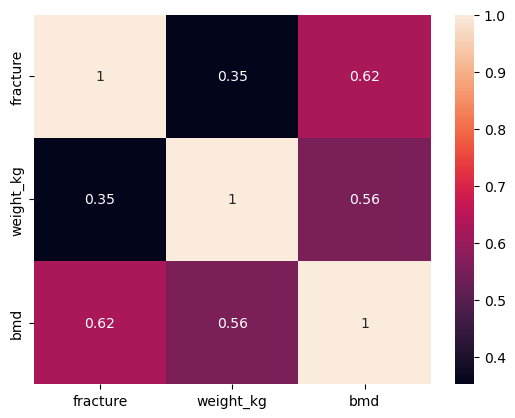

In [605]:
sns.heatmap(data[predictive_features].corr(), annot=True)

In [606]:
# Delete The Target Variable from Preditive Features
predictive_features = predictive_features.delete(-1)

In [607]:
X = data[predictive_features]
Y = bone_df["bmd"]

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=42)

In [609]:
linear_reg = linear_model.LinearRegression()

In [610]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [611]:
y_train_predictions = linear_reg.predict(X_train)

In [612]:
y_predicted = linear_reg.predict(X_test)

### Accuracy and Model Report

In [613]:
print('Co-efficient of linear regression', linear_reg.coef_)
print('Intercept of linear regression model', linear_reg.intercept_)
print('Training Mean Square Error ', metrics.mean_squared_error(y_train, y_train_predictions))
print('Testing Mean Square Error ', metrics.mean_squared_error(y_test, y_predicted))

Co-efficient of linear regression [0.17280937 0.00564723]
Intercept of linear regression model 0.2942174730248054
Training Mean Square Error  0.013579857509471589
Testing Mean Square Error  0.01215199149496455


# Polynomial Linear Regression 
most of the Features are not Linearly correlated as we saw, Lets Try give our Model Higher Capacity to model The Mappings between X -> Y

In [614]:
data = bone_df.iloc[:]
data.head()

,age,sex,fracture,weight_kg,height_cm,bmd,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication,bmi kk/cm2
0,57.052768,0,1,64.0,155.5,0.8793,1,0,0,0.002647
1,75.741225,0,1,78.0,162.0,0.7946,0,0,1,0.002972
2,70.778900,1,1,73.0,170.5,0.9067,0,0,1,0.002511
3,78.247175,0,1,60.0,148.0,0.7112,0,0,1,0.002739
4,54.191877,1,1,55.0,161.0,0.7909,0,0,1,0.002122


In [615]:
X = data.drop(columns=["bmd"])
Y = data["bmd"]

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=42)

In [617]:
# transforms the existing features to higher degree features.
MODEL_CAPACITY = 1  # Best Capacity suits the Problem is the Linear Capacity
poly_features = PolynomialFeatures(degree=MODEL_CAPACITY)
X_train_poly = poly_features.fit_transform(X_train)

In [618]:
poly_reg = linear_model.LinearRegression()

In [619]:
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [620]:
y_train_predicted = poly_reg.predict(X_train_poly)

#### WARNINGS: Do not forget to Transform Testing set Features to higher Capacity

In [621]:
X_test_poly = poly_features.fit_transform(X_test)

In [622]:
y_predicted = poly_reg.predict(X_test_poly)

In [623]:
print('Co-efficient of linear regression', poly_reg.coef_)
print('Intercept of linear regression model', poly_reg.intercept_)
print('Training Mean Square Error', metrics.mean_squared_error(y_train, y_train_predicted))
print('Testing Mean Square Error', metrics.mean_squared_error(y_test, y_predicted))

Co-efficient of linear regression [ 0.00000000e+00 -8.60721658e-04  5.22442543e-02  1.81755544e-01
  2.37380162e-02 -1.49101361e-02 -3.62180420e-03 -1.72389498e-02
  2.08607540e-02 -4.83586536e+02]
Intercept of linear regression model 2.737754458190153
Training Mean Square Error 0.012011162831662594
Testing Mean Square Error 0.010708711357271299


#### Polynomial Model of The deg. of MODEL_CAPACITY Report

### MODEL_CAPACITY = 1 [Funny Fact]
Model with only Bias term = 0.7775103685925926 get: <br>
Training Mean Square Error 0.028483290187959424 <br>
Testing Mean Square Error 0.024088169815254003
### MODEL_CAPACITY = 1 [GOOD Capacity!]
Training Mean Square Error 0.012011162831662594 <br>
Testing Mean Square Error 0.010708711357271299
### MODEL_CAPACITY = 2 [Less better Job Than Linear Relation]
Training Mean Square Error 0.008582959809258897 <br>
Testing Mean Square Error 0.045074851414324005
### MODEL_CAPACITY = 3 [Overfitting]
Training Mean Square Error 0.003551282195076086 <br>
Testing Mean Square Error 7172409361.248749

# END OF TASK